<a href="https://colab.research.google.com/github/asadbek08/DataScienceMohirdev/blob/main/ProjectML_Tashkent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *This modul predicts apartment prices in Tashkent*

# ***Train_test Split***

In [6]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.drop('location', axis=1, inplace=True)
df = df[df['price']!="Договорная"]
df = df[df['size']!='Площадьземли:1сот']
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=23)

X = train_set.drop('price', axis=1)
y = train_set['price'].copy()

X_num = X.drop('district', axis=1)


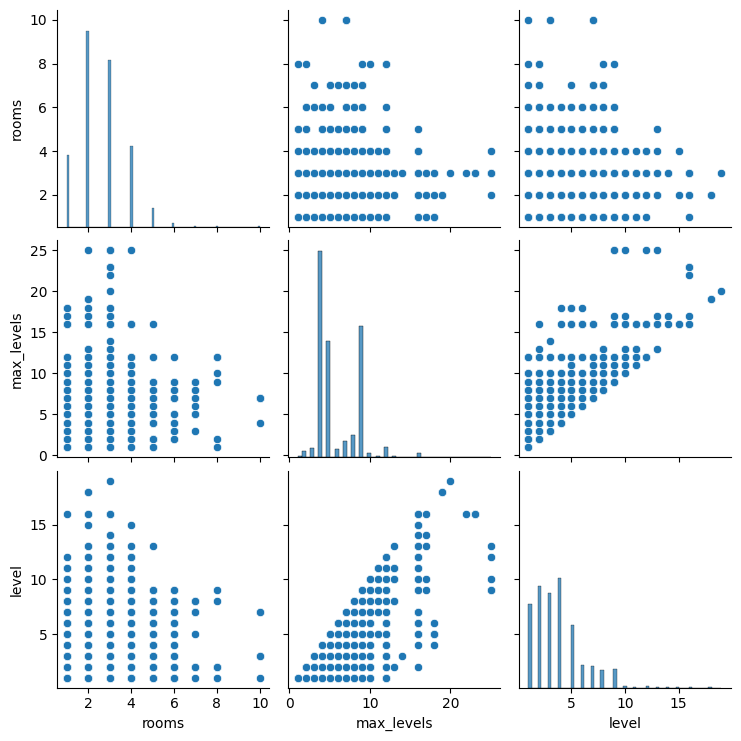

In [7]:
sns.pairplot(df[['rooms','size', 'max_levels', 'level']])
plt.show()

In [8]:
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57,4,4,52000
1,Яккасарайский,2,52,4,5,56000
2,Чиланзарский,2,42,4,4,37000
3,Чиланзарский,3,65,1,4,49500
4,Чиланзарский,3,70,3,5,55000


# ***Pipeline***

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


pipe_num = Pipeline([
    ('scaler', StandardScaler())
])

pipe_num.fit_transform(X_num)

array([[-0.57072362, -0.01959493,  0.58232105,  2.31570264],
       [ 2.19430732,  0.02659664, -0.31536127,  1.15600652],
       [ 0.35095336, -0.01119646, -1.21304359, -0.77682033],
       ...,
       [ 0.35095336, -0.03009301, -0.31536127, -0.00368959],
       [-0.57072362, -0.03849148,  0.13347989, -0.77682033],
       [-0.57072362, -0.03219263,  0.13347989, -0.77682033]])

In [11]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
text_attrib = ['district']

full_pipe = ColumnTransformer([
    ('num', pipe_num, num_attribs),
    ('encode', OneHotEncoder(), text_attrib)
])

X_prepared = full_pipe.fit_transform(X)

# ***Linear Regression***

In [12]:

from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_prepared, y)

LinearRegression()

In [13]:
X_test = test_set.drop('price', axis=1)
y_test = test_set['price'].copy()

X_test_prepared = full_pipe.fit_transform(X_test)

y_test_predicted = LR_model.predict(X_test_prepared)

In [14]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_test_predicted)
RMSE = np.sqrt(mse)
print(RMSE)


126695.5924431982


# ***Decision Tree***

In [15]:
from sklearn.tree import DecisionTreeRegressor

DR_model = DecisionTreeRegressor()
DR_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [16]:

y_test_predicted = DR_model.predict(X_test_prepared)

mse = mean_squared_error(y_test, y_test_predicted)
RMSE = np.sqrt(mse)
# print(RMSE)
data = pd.DataFrame({'Column1': y_test, 'Column2': y_test_predicted})
data.sample(29)

,Column1,Column2
5439,38500,26100.0
1982,29000,21000.0
6555,31000,19000.0
1620,29400,41000.0
3300,31500,32000.0
4742,95000,35000.0
6437,24000,23600.0
5393,53500,35000.0
4825,46500,38000.0
1491,45000,37000.0
